### Student Activity: Portfolio Planner Part 2

This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

Alternatively filters the same 10 stocks (from part 1) down to only minimally-correlated stocks with higher sharpe ratios, and calculates the returns of a hypothetical `$10,000` investment for the constructed optimized portfolio. Returns of the optimized portfolio are then compared to lesser-optimized portfolios.

---

### PART 1: Portfolio Optimization via Risk Evaluation

In [38]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSVs as DataFrames 

In [39]:
# Set the file paths
bk_data = Path("bk_data.csv")
fang_data = Path("fang_data.csv")
jnj_data = Path("JNJ.csv")
luv_data = Path("luv_data.csv")
mu_data = Path("MU.csv")
nflx_data = Path("nflx.csv")
NVDA_data = Path("NVDA.csv")
snap_data = Path("snap_data.csv")
twtr_data = Path("twtr_data.csv")
amd_data = Path("AMD.csv")
tsm_data = Path("TSM.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nflx_df = pd.read_csv(nflx_data, index_col="date", infer_datetime_format=True, parse_dates=True)
snap_df = pd.read_csv(snap_data, index_col="date", infer_datetime_format=True, parse_dates=True)
twtr_df = pd.read_csv(twtr_data, index_col="date", infer_datetime_format=True, parse_dates=True)
amd_df = pd.read_csv(amd_data, index_col="date", infer_datetime_format=True, parse_dates=True)
tsm_df = pd.read_csv(tsm_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nvda_df = pd.read_csv(NVDA_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
# Display a few rows
snap_df.head()

,close
date,
2019-05-17,11.49
2019-05-16,11.42
2019-05-15,10.66
2019-05-14,10.49
2019-05-13,10.11


### Combine DataFrames, Sort Index, and Rename Columns

In [40]:
# Create a new pivot table where the columns are the closing prices for each ticker
df = pd.concat([bk_df,fang_df,jnj_df,luv_df,mu_df,nflx_df,snap_df,twtr_df,amd_df,tsm_df,nvda_df], axis = 1, join = "inner")

# Sort datetime index in ascending order (past to present)
df.sort_index(inplace=True)

# Set column names
df.columns = ['BK','FANG','JNJ','LUV','MU','NFLX','SNAP','TWTR','AMD','TSM','NVDA']

# Display a few rows
df.head()

,BK,FANG,JNJ,LUV,MU,NFLX,SNAP,TWTR,AMD,TSM,NVDA
date,,,,,,,,,,,
2017-03-02,47.99,103.82,55.25,57.57,24.70,139.53,24.48,15.79,13.90,30.87,99.00
2017-03-03,47.95,103.58,56.42,58.86,25.57,139.14,27.09,15.75,13.03,30.85,98.43
2017-03-06,47.90,103.96,56.61,57.56,25.71,141.94,23.77,15.56,13.04,30.85,97.67
2017-03-07,47.67,104.58,56.58,56.83,25.64,141.43,21.44,15.18,13.05,31.31,98.74
2017-03-08,48.19,99.76,54.77,56.68,25.38,140.32,22.81,15.24,13.22,31.22,98.56


### Calculate Daily Returns

In [41]:
# Use the `pct_change` function to calculate daily returns
daily_returns = df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NFLX,SNAP,TWTR,AMD,TSM,NVDA
date,,,,,,,,,,,
2017-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-03,-0.000834,-0.002312,0.021176,0.022408,0.035223,-0.002795,0.106618,-0.002533,-0.062590,-0.000648,-0.005758
2017-03-06,-0.001043,0.003669,0.003368,-0.022086,0.005475,0.020124,-0.122554,-0.012063,0.000767,0.000000,-0.007721
2017-03-07,-0.004802,0.005964,-0.000530,-0.012682,-0.002723,-0.003593,-0.098023,-0.024422,0.000767,0.014911,0.010955
2017-03-08,0.010908,-0.046089,-0.031990,-0.002639,-0.010140,-0.007848,0.063899,0.003953,0.013027,-0.002874,-0.001823


### Evaluate Riskiness of Stocks

In [42]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

BK      0.204019
JNJ     0.226371
TSM     0.231297
LUV     0.257294
FANG    0.350062
NFLX    0.390658
MU      0.442576
NVDA    0.456019
TWTR    0.498349
AMD     0.609459
SNAP    0.663026
dtype: float64

### Drop High Volatility Stocks

In [43]:
# Drop the 5 stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'TWTR', 'AMD', 'SNAP', 'NVDA'], inplace=True)
daily_returns.head()

,BK,FANG,JNJ,LUV,NFLX,TSM
date,,,,,,
2017-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-03,-0.000834,-0.002312,0.021176,0.022408,-0.002795,-0.000648
2017-03-06,-0.001043,0.003669,0.003368,-0.022086,0.020124,0.000000
2017-03-07,-0.004802,0.005964,-0.000530,-0.012682,-0.003593,0.014911
2017-03-08,0.010908,-0.046089,-0.031990,-0.002639,-0.007848,-0.002874


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [44]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# BK, JNJ, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50, 0.3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2017-03-02         NaN
2017-03-03    0.004767
2017-03-06    0.006008
2017-03-07   -0.000335
2017-03-08   -0.009182
dtype: float64

### Calculate Cumulative Returns

In [45]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

date
2017-03-02         NaN
2017-03-03    1.004767
2017-03-06    1.010804
2017-03-07    1.010465
2017-03-08    1.001187
dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<Axes: xlabel='date'>

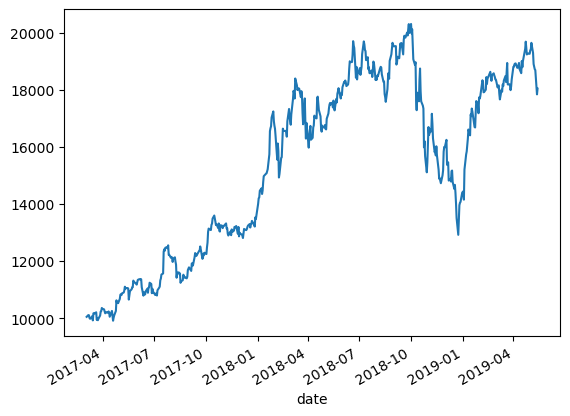

In [46]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

In [47]:
df.head()

,BK,FANG,JNJ,LUV,MU,NFLX,SNAP,TWTR,AMD,TSM,NVDA
date,,,,,,,,,,,
2017-03-02,47.99,103.82,55.25,57.57,24.70,139.53,24.48,15.79,13.90,30.87,99.00
2017-03-03,47.95,103.58,56.42,58.86,25.57,139.14,27.09,15.75,13.03,30.85,98.43
2017-03-06,47.90,103.96,56.61,57.56,25.71,141.94,23.77,15.56,13.04,30.85,97.67
2017-03-07,47.67,104.58,56.58,56.83,25.64,141.43,21.44,15.18,13.05,31.31,98.74
2017-03-08,48.19,99.76,54.77,56.68,25.38,140.32,22.81,15.24,13.22,31.22,98.56


---

### PART 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Reset Daily Returns DataFrame

In [48]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_return = df.pct_change()
daily_return

,BK,FANG,JNJ,LUV,MU,NFLX,SNAP,TWTR,AMD,TSM,NVDA
date,,,,,,,,,,,
2017-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-03,-0.000834,-0.002312,0.021176,0.022408,0.035223,-0.002795,0.106618,-0.002533,-0.062590,-0.000648,-0.005758
2017-03-06,-0.001043,0.003669,0.003368,-0.022086,0.005475,0.020124,-0.122554,-0.012063,0.000767,0.000000,-0.007721
2017-03-07,-0.004802,0.005964,-0.000530,-0.012682,-0.002723,-0.003593,-0.098023,-0.024422,0.000767,0.014911,0.010955
2017-03-08,0.010908,-0.046089,-0.031990,-0.002639,-0.010140,-0.007848,0.063899,0.003953,0.013027,-0.002874,-0.001823
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-08,-0.001870,0.077573,-0.004674,0.003831,-0.012668,-0.016439,-0.031334,-0.001036,0.016129,-0.001371,0.004679
2019-05-09,-0.005619,0.022579,0.000303,0.000954,-0.012075,-0.004446,0.014787,0.005443,0.004430,-0.010297,-0.021447
2019-05-10,0.006697,-0.003234,0.017868,0.005337,-0.008403,-0.004714,-0.044627,-0.008765,0.027563,-0.009711,-0.008050


### Evaluate Correlation of Stock Returns

In [49]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_return.corr()
correlation

,BK,FANG,JNJ,LUV,MU,NFLX,SNAP,TWTR,AMD,TSM,NVDA
BK,1.000000,0.247740,0.304161,0.313888,0.277723,0.298497,0.088787,0.180033,0.221820,0.261611,0.307245
FANG,0.247740,1.000000,0.503358,0.145404,0.244602,0.313643,0.069120,0.187831,0.222383,0.302530,0.243481
JNJ,0.304161,0.503358,1.000000,0.211152,0.223421,0.293068,0.084689,0.168446,0.180148,0.257183,0.216043
LUV,0.313888,0.145404,0.211152,1.000000,0.293777,0.240208,0.146402,0.070262,0.305098,0.295504,0.259405
MU,0.277723,0.244602,0.223421,0.293777,1.000000,0.439046,0.169664,0.296312,0.443917,0.515458,0.562952
NFLX,0.298497,0.313643,0.293068,0.240208,0.439046,1.000000,0.148818,0.380591,0.378596,0.423798,0.490811
SNAP,0.088787,0.069120,0.084689,0.146402,0.169664,0.148818,1.000000,0.282618,0.113395,0.130781,0.221605
TWTR,0.180033,0.187831,0.168446,0.070262,0.296312,0.380591,0.282618,1.000000,0.221311,0.268472,0.363031
AMD,0.221820,0.222383,0.180148,0.305098,0.443917,0.378596,0.113395,0.221311,1.000000,0.395252,0.566556
TSM,0.261611,0.302530,0.257183,0.295504,0.515458,0.423798,0.130781,0.268472,0.395252,1.000000,0.564848


<Axes: >

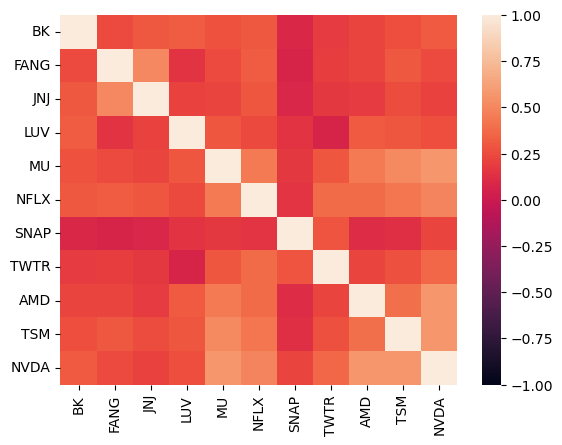

In [50]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmax = 1, vmin = -1)

In [51]:
# Alternatively, sum total correlation for each stock
total_corr = df.corr().sum()
total_corr

BK      4.125821
FANG    5.402617
JNJ     4.883522
LUV     1.281052
MU      5.811461
NFLX    5.302855
SNAP   -2.050018
TWTR    4.957672
AMD     2.492825
TSM     5.112593
NVDA    5.850020
dtype: float64

In [55]:
total_corr.sort_values(inplace=True)
total_corr

SNAP   -2.050018
LUV     1.281052
AMD     2.492825
BK      4.125821
JNJ     4.883522
TWTR    4.957672
TSM     5.112593
NFLX    5.302855
FANG    5.402617
MU      5.811461
NVDA    5.850020
dtype: float64

In [57]:
total_corr.iloc[-2:].index

Index(['MU', 'NVDA'], dtype='object')

### Drop the Two Most Consistently Correlated Stocks

In [53]:
# Drop highly correlated stocks and keep only the non-correlated stocks
dropped_columns = ['MU','NVDA']
df.drop(columns=dropped_columns, inplace=True)
df.head()

,BK,FANG,JNJ,LUV,NFLX,SNAP,TWTR,AMD,TSM
date,,,,,,,,,
2017-03-02,47.99,103.82,55.25,57.57,139.53,24.48,15.79,13.90,30.87
2017-03-03,47.95,103.58,56.42,58.86,139.14,27.09,15.75,13.03,30.85
2017-03-06,47.90,103.96,56.61,57.56,141.94,23.77,15.56,13.04,30.85
2017-03-07,47.67,104.58,56.58,56.83,141.43,21.44,15.18,13.05,31.31
2017-03-08,48.19,99.76,54.77,56.68,140.32,22.81,15.24,13.22,31.22


### Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks

In [60]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sr = daily_return.mean()/daily_return.std()* np.sqrt(252)
sr.sort_values(inplace=True, ascending = False)
sr

NFLX    1.252653
TWTR    1.026631
AMD     0.812282
NVDA    0.723494
TSM     0.721177
MU      0.678768
JNJ     0.500630
FANG    0.240354
BK      0.056756
LUV    -0.063483
SNAP   -0.264180
dtype: float64

### Drop the Three Lowest Sharpe Ratio Stocks

In [62]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks
sr.iloc[-2:].index
dropping = srsr.drop(columns=)

Index(['LUV', 'SNAP'], dtype='object')

### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

In [ ]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio


### Evaluate Investment in Minimally-Correlated (Diversified) Portfolio

In [ ]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio


### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

In [ ]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio


### Overlay Hypothetical Portfolio Investments

In [ ]:
# Set the figure of the chart and plot each data trend on the single figure
